In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


#http://tsfresh.readthedocs.io/en/latest/text/quick_start.html

In [3]:
download_robot_execution_failures()
df, y = load_robot_execution_failures()
df.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


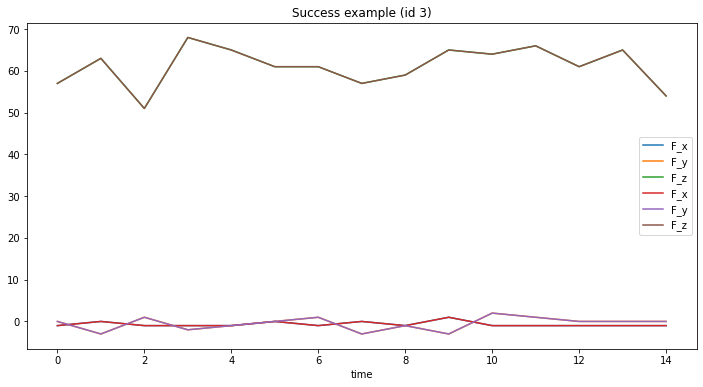

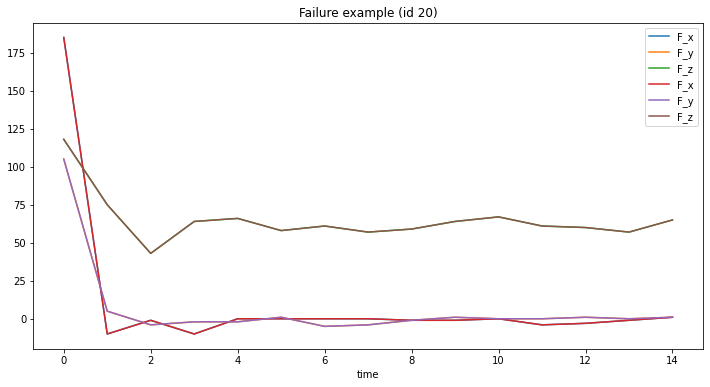

In [4]:
# df[df.id == 3][['time', 'a', 'b', 'c', 'd', 'e', 'f']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
# df[df.id == 20][['time', 'a', 'b', 'c', 'd', 'e', 'f']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

df[df.id == 3][['time', 'F_x', 'F_y', 'F_z', 'F_x', 'F_y', 'F_z']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
df[df.id == 20][['time', 'F_x', 'F_y', 'F_z', 'F_x', 'F_y', 'F_z']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

In [5]:
extraction_settings = ComprehensiveFCParameters()

In [6]:
#column_id (str) – The name of the id column to group by
#column_sort (str) – The name of the sort column.
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute)

Feature Extraction: 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


In [7]:
X.head()

,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__fourier_entropy__bins_2,T_y__fourier_entropy__bins_3,T_y__fourier_entropy__bins_5,T_y__fourier_entropy__bins_10,T_y__fourier_entropy__bins_100,T_y__permutation_entropy__dimension_3__tau_1,T_y__permutation_entropy__dimension_4__tau_1,T_y__permutation_entropy__dimension_5__tau_1,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.376770,0.735622,0.900256,1.386294,2.079442,1.230932,1.863680,2.271869,2.302585,2.197225
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,0.562335,1.039721,1.494175,1.732868,2.079442,1.585771,2.369382,2.397895,2.302585,2.197225
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,0.693147,0.974315,1.320888,1.906155,2.079442,1.671595,2.253858,2.397895,2.302585,2.197225
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,0.661563,1.039721,1.320888,1.732868,1.906155,1.671595,2.253858,2.397895,2.302585,2.197225
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,0.562335,1.039721,1.039721,1.732868,2.079442,1.671595,2.253858,2.397895,2.302585,2.197225


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4674 entries, T_z__variance_larger_than_standard_deviation to T_y__permutation_entropy__dimension_7__tau_1
dtypes: float64(4674)
memory usage: 3.1 MB


In [9]:
X_filtered = extract_relevant_features(df, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


In [10]:
X_filtered.head()

,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,...,0.0,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-596.000000,-1.0,-1.0
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,...,0.0,1.0,-9.2,1.0,0.057818,-0.202951,-3.6,-680.384615,-1.0,-1.0
3,11.0,12.0,14.0,40.0,3.128889,1.768867,2.203858,8.235442,103.0,4.616877,...,0.0,3.0,-6.6,0.0,0.912474,0.539121,-4.0,-617.000000,-1.0,0.0
4,5.0,16.0,10.0,60.0,7.128889,2.669998,0.844394,12.067855,124.0,3.833188,...,0.0,0.0,-9.0,0.0,-0.609735,-2.641390,-4.6,3426.307692,-1.0,1.0
5,9.0,17.0,13.0,46.0,4.160000,2.039608,2.730599,6.445330,180.0,4.841487,...,0.0,0.0,-9.6,0.0,0.072771,0.591927,-5.0,-2609.000000,-1.0,0.8


In [11]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 671 entries, F_x__value_count__value_-1 to F_y__quantile__q_0.7
dtypes: float64(671)
memory usage: 462.0 KB


In [12]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)

In [13]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.85      0.88        26
        True       0.67      0.80      0.73        10

    accuracy                           0.83        36
   macro avg       0.79      0.82      0.80        36
weighted avg       0.85      0.83      0.84        36



In [14]:
cl.n_features_

4674

In [15]:
cl2 = DecisionTreeClassifier()
cl2.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl2.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       0.92      0.85      0.88        26
        True       0.67      0.80      0.73        10

    accuracy                           0.83        36
   macro avg       0.79      0.82      0.80        36
weighted avg       0.85      0.83      0.84        36



In [16]:
cl2.n_features_

671